<a href="https://colab.research.google.com/github/arvieira/bootcamp_modulo_02/blob/main/Notebooks/ProjetoModulo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# plt.style.use('dark_background')
# plt.style.available

In [ ]:
# imports das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


<p align="center">
  <img src="https://portalarquivos.saude.gov.br/campanhas/pni/img/pni_destaque.jpg" width = 70%>
</p>


# Projeto: Análise do Programa Nacional de Imunizações
#####Aluno:André Vieira
---
- # Do Programa Nacional de Imunização:

O Programa Nacional de Imunizações (PNI) é uma ação do governo federal brasileiro, que busca levar acesso gratuito a vacinas, soros e imunoglobulinas à toda a sua população.
A vacinação em massa da população possibilita a erradicação de doenças ou a grande redução de doenças como varíola, poliomelite, sarampo, rubéola, tétano, difiteria, coqueluche entre outras.

A vacinação é realizada pelo Sistema Único de Saúde (SUS) em postos de saúde e clínicas da família. 
O programa é executado respeitando um calendário único confeccionado a partir de estudos acerca de situações epidemiológicas, riscos de doenças, vulnerabilidades de populações e especificidades sociais.
Há orientações específicas para crianças, adolescentes, adultos, gestantes, idosos e povos indígenas, com a utilização da caderneta de vacinação.

(fonte: https://portalarquivos.saude.gov.br/campanhas/pni/)

---
- # Das Vacinas que Compõem o PNI

O PNI separa os grupos de vacinas nos seguintes grupos, de acordo com as características do público alvo: Criança, Adolescente, Adulto, Idoso e Gestante.
Para cada grupo, há o momento certo de se tomar as doses de cada uma das vacinas providas pelo programa segundo o Calendário Nacional de Vacinação a seguir.


In [ ]:
# 
dados_vacinas = [['Crianças', 'Ao nascer', 'Dose única', 'Dose ao nascer', '', '', '', '', '', '', '', '', '', '', '', ''], 
        ['Crianças', '2 meses', '', '', '1ª Dose', '1ª Dose (com VIP)', '1ª Dose', '1ª Dose', '', '', '', '', '', '', '', ''],
        ['Crianças', '3 meses', '', '', '', '', '', '', '1ª Dose', '', '', '', '', '', '', ''],
        ['Crianças', '4 meses', '', '', '2ª Dose', '2ª Dose (com VIP)', '2ª Dose', '2ª Dose', '', '', '', '', '', '', '', ''],
        ['Crianças', '5 meses', '', '', '', '', '', '', '2ª Dose', '', '', '', '', '', '', ''],
        ['Crianças', '6 meses', '', '', '3ª Dose', '3ª Dose (com VIP)', '3ª Dose', '', '', '', '', '', '', '', '', ''],
        ['Crianças', '9 meses', '', '', '', '', '', '', '', 'Uma dose', '', '', '', '', '', ''],
        ['Crianças', '12 meses', '', '', '', '', 'Reforço', '', '', '', 'Uma dose', '1ª Dose', '', '', '', ''],
        ['Crianças', '15 meses', '', '', '1º Reforço (com DTP)', 'Reforço (com VOP)', '', '', 'Reforço', '', '', '', 'Uma dose', '', '', ''],
        ['Crianças', '4 anos', '', '', '2ª Reforço (com DTP)', '2ª Reforço (com VOP)', '', '', '', 'Reforço', '', '', '', '', '', ''],
        ['Crianças', '9 anos', '', '', '', '', '', '', '', '', '', '', '', '3 doses (9 a 11 anos)', '', ''],
        ['Adolescente', '10 a 19 anos', '', '3 doses (a depender da situação vacinal)', '', '', '', '', '', 'Uma dose e um reforço, a depender da situação vacinal', '', '2 doses', '', '3 doses (9 a 11 anos)', 'Reforço (a cada 10 anos)', ''],
        ['Adulto', '20 a 59 anos', '', '3 doses (a depender da situação vacinal)', '', '', '', '', '', '', 'Uma dose e um reforço, a depender da situação vacinal', '', '1 dose (até 49 anos)', '', 'Reforço (a cada 10 anos)', ''],
        ['Idoso', '60 anos ou mais', '', '3 doses (a depender da situação vacinal)', '', '', '', '', '', 'Em situação de risco de contrair a doença, o médico deverá avaliar o benefício/risco da vacinação', '', '', '', '', 'Reforço (a cada 10 anos)', ''],
        ['Gestante', '', '', '3 doses (a depender da situação vacinal)', '', '', '', '', '', '', '', '', '', '', '3 doses (a depender da situação vacinal)', 'Uma dose a cada gestação entre a 27ª e a 36ª semana']]


df = pd.DataFrame(dados_vacinas, columns=[
                                 'Grupo-alvo', 
                                 'Idade', 
                                 'BCG', 
                                 'Hepatite B', 
                                 'Penta', 
                                 'VIP/VOP', 
                                 'Pneumocócica 1.0V', 
                                 'Roravírus Humano',
                                 'Meningogócica C',
                                 'Febre Amarela',
                                 'Hepatite A',
                                 'Tríplice Viral',
                                 'Tetra Viral',
                                 'HPV',
                                 'Dupla Adulto',
                                 'dTpa'])

df

,Grupo-alvo,Idade,BCG,Hepatite B,Penta,VIP/VOP,Pneumocócica 1.0V,Roravírus Humano,Meningogócica C,Febre Amarela,Hepatite A,Tríplice Viral,Tetra Viral,HPV,Dupla Adulto,dTpa
0,Crianças,Ao nascer,Dose única,Dose ao nascer,,,,,,,,,,,,
1,Crianças,2 meses,,,1ª Dose,1ª Dose (com VIP),1ª Dose,1ª Dose,,,,,,,,
2,Crianças,3 meses,,,,,,,1ª Dose,,,,,,,
3,Crianças,4 meses,,,2ª Dose,2ª Dose (com VIP),2ª Dose,2ª Dose,,,,,,,,
4,Crianças,5 meses,,,,,,,2ª Dose,,,,,,,
5,Crianças,6 meses,,,3ª Dose,3ª Dose (com VIP),3ª Dose,,,,,,,,,
6,Crianças,9 meses,,,,,,,,Uma dose,,,,,,
7,Crianças,12 meses,,,,,Reforço,,,,Uma dose,1ª Dose,,,,
8,Crianças,15 meses,,,1º Reforço (com DTP),Reforço (com VOP),,,Reforço,,,,Uma dose,,,
9,Crianças,4 anos,,,2ª Reforço (com DTP),2ª Reforço (com VOP),,,,Reforço,,,,,,




---
- # Do DATASUS e o TabNet

O DATASUS é um órgão da Secretaria de Gestão Estratégica e Participativa do Ministério da Saúde, compondo o departamento de informática do Sistema Único de Saúde (SUS).
O departamento em questão possui a finalidade de desenvolver sistemas informáticos para fortalecimento do SUS, provendo soluções tecnológicas para as secretarias estaduais e municipais.

Um importante sistema informático que possibilita o acesso público à informações estatísticas do SUS é o TabNet.
Este sistema apresenta os dados de maneira organizada e passiveis de filtros para subsidiar análises objetivas da situação sanitária do país e tomadas de decisão baseadas em evidências.

---
- # Da Obtenção dos Dados

A obtenção dos dados para essa análise foi realizada com a utilização da ferramenta TabNet (http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def) provida pelo DATASUS, descrita anteriormente.
A base de dados utilizada foi do Programa Nacional de Imunizações (PNI), apresentando a cobertura vacinal no território brasileiro.

Para a construção da base, foram utilizados os seguintes parâmetros:
- Linha: Unidade da Federação
- Coluna: Ano
- Conteúdo: Coberturas Vacinais
- Períodos Disponíveis: 1994 a 2019

---
- # Do Objetivo

O objetivo dessa análise é a realização de uma exploração dos dados históricos da cobertura vacinal do PNI.
Para tanto, foram obtidas séries históricas dos dados que compõem as coberturas vacinais, separadas por unidade da federação.
Será possível uma análise comparativa da evolução histórica dos estados perante a aplicação das vacinas. 
Assim como, analisar a dificuldade de se fazer uma maior cobertuda levando em consideração tamanho da população e densidade demográfica de cada unidade federativa.

---
- # Das Perguntas
  - A evolução da cobertura vacinal seguiu uma tendência crescente durante os anos, mostrando um desenvolvimento da saúde do país?
  - Estados com maiores Índices de Desenvolvimento Humano (IDH) possuem uma cobertura vacinal maior?
  - Estados com uma maior população tendem a possuir uma cobertura vacinal menor por necessitar maiores campanhas de vacinação e um maior número de doses a serem aplicadas?
  - Estados menos populosos, nos quais os habitantes ficam mais isolados, possuem uma cobertura vacinal menor?



---
# Importação e limpeza dos dados

---

In [ ]:
dados = pd.read_csv(
    'https://raw.githubusercontent.com/arvieira/bootcamp_modulo_02/main/dados/A120623189_28_143_208.csv',
    encoding='ISO-8859-1',
    skiprows=3, 
    sep=';',
    skipfooter=19,
    decimal=','
)

dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44,79.88
1,12 Acre,20.53,46.61,36.59,67.56,66.38,85.61,66.79,76.77,81.66,77.54,80.21,72.09,70.66,80.54,75.04,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44,69.26
2,13 Amazonas,20.15,35.82,49.88,72.01,70.62,72.19,70.91,70.68,70.98,64.77,72.14,73.67,74.81,78.84,76.40,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97,69.65
3,14 Roraima,64.06,88.84,89.18,80.26,97.45,93.76,83.94,72.67,78.33,72.99,80.28,78.26,74.22,76.90,71.13,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04,75.68
4,15 Pará,32.44,40.11,51.26,67.09,67.46,82.95,77.23,83.43,82.66,80.50,97.38,89.17,86.99,87.87,84.70,84.02,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53,73.89


In [ ]:
dados.shape

(28, 28)

---
O dataframe possui 28 colunas e 28 linhas. Nas linhas temos 27 unidades federativas e 1 linha de cabeçário. Quanto às colunas, temos 28, sendo uma contendo as unidades federativas e uma contendo o total. Nesse caso, temos 26 anos para realizar a análise. 

---

In [ ]:
# Conhecendo os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  28 non-null     object 
 1   1994                  28 non-null     object 
 2   1995                  28 non-null     object 
 3   1996                  28 non-null     object 
 4   1997                  28 non-null     float64
 5   1998                  28 non-null     float64
 6   1999                  28 non-null     float64
 7   2000                  28 non-null     float64
 8   2001                  28 non-null     float64
 9   2002                  28 non-null     float64
 10  2003                  28 non-null     float64
 11  2004                  28 non-null     float64
 12  2005                  28 non-null     float64
 13  2006                  28 non-null     float64
 14  2007                  28 non-null     float64
 15  2008                  28 

---
Aqui vemos que as colunas 1994, 1995, 1996 são objects, quando deveriam ser float64 como as demais. Temos algum problema que deve ser solucionado com uma limpeza dos dados.

---

In [ ]:
# Procurando os problemas nos dados
dados[['1994','1995','1996']].select_dtypes('object')

,1994,1995,1996
0,42.76,50.80,76.05
1,20.53,46.61,36.59
2,20.15,35.82,49.88
3,64.06,88.84,89.18
4,32.44,40.11,51.26
5,...,34.68,44.75
6,...,...,65.44
7,27.43,35.69,41.05
8,62.22,48.16,46.40
9,49.20,50.06,60.28


---
Conforme as análises, algumas unidades federativas não apresentam dados no início da série histórica. Desse modo, não é possível fazer uma interpolação devido à falta de dados anteriores e posteriores ao intervalo com problema. 

Entretanto, estão disponíveis outros 23 anos com dados completos para a realização das análises. Logo, os 3 primeiros anos das séries dos estados serão descartados. Cabe ressaltar que, os totais também não serão utilizados.

---

In [ ]:
# Eliminando as colunas que não serão utilizadas
dados_tratados = dados.drop(['1994', '1995', '1996', 'Total'], axis=1)
dados_tratados = dados_tratados.set_index('Unidade da Federação')

# Salvando para uso posterior sem a transposição que vou fazer
historico_cobertura_vacinal = dados_tratados

dados_tratados.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44
12 Acre,67.56,66.38,85.61,66.79,76.77,81.66,77.54,80.21,72.09,70.66,80.54,75.04,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44
13 Amazonas,72.01,70.62,72.19,70.91,70.68,70.98,64.77,72.14,73.67,74.81,78.84,76.40,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97
14 Roraima,80.26,97.45,93.76,83.94,72.67,78.33,72.99,80.28,78.26,74.22,76.90,71.13,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04
15 Pará,67.09,67.46,82.95,77.23,83.43,82.66,80.50,97.38,89.17,86.99,87.87,84.70,84.02,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53


In [ ]:
dados_tratados = dados_tratados.T
dados_tratados.index = dados_tratados.index.astype(int)
dados_tratados = dados_tratados.drop('Total', axis=1)
dados_tratados.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
1997,83.33,67.56,72.01,80.26,67.09,52.06,56.24,60.33,57.65,74.00,61.55,63.28,82.44,50.95,73.92,59.22,62.60,77.78,69.12,74.70,76.53,73.29,65.07,70.62,74.22,70.07,64.17
1998,93.26,66.38,70.62,97.45,67.46,73.77,86.73,68.09,64.59,64.09,58.99,61.39,81.41,54.52,71.66,64.03,62.43,89.21,73.78,79.73,63.40,71.64,63.25,75.01,78.08,73.23,84.43
1999,82.31,85.61,72.19,93.76,82.95,83.48,87.82,81.10,81.53,88.63,78.80,81.68,87.47,78.30,98.68,82.45,90.14,94.67,91.77,92.11,75.09,82.85,85.90,92.05,84.87,87.36,86.24
2000,79.59,66.79,70.91,83.94,77.23,70.61,80.63,74.81,78.74,78.82,70.21,72.88,76.93,72.36,77.96,74.08,79.70,79.36,75.16,76.19,78.72,75.49,71.91,85.08,84.34,82.76,73.49
2001,83.70,76.77,70.68,72.67,83.43,101.50,87.42,79.09,81.18,83.18,73.12,80.28,76.73,74.45,79.01,81.56,90.28,80.75,75.02,76.51,81.01,78.11,75.60,88.66,85.97,83.87,71.77


---
# Pergunta 1: A evolução da cobertura vacinal seguiu uma tendência crescente durante os anos, mostrando um desenvolvimento da saúde do país?

---

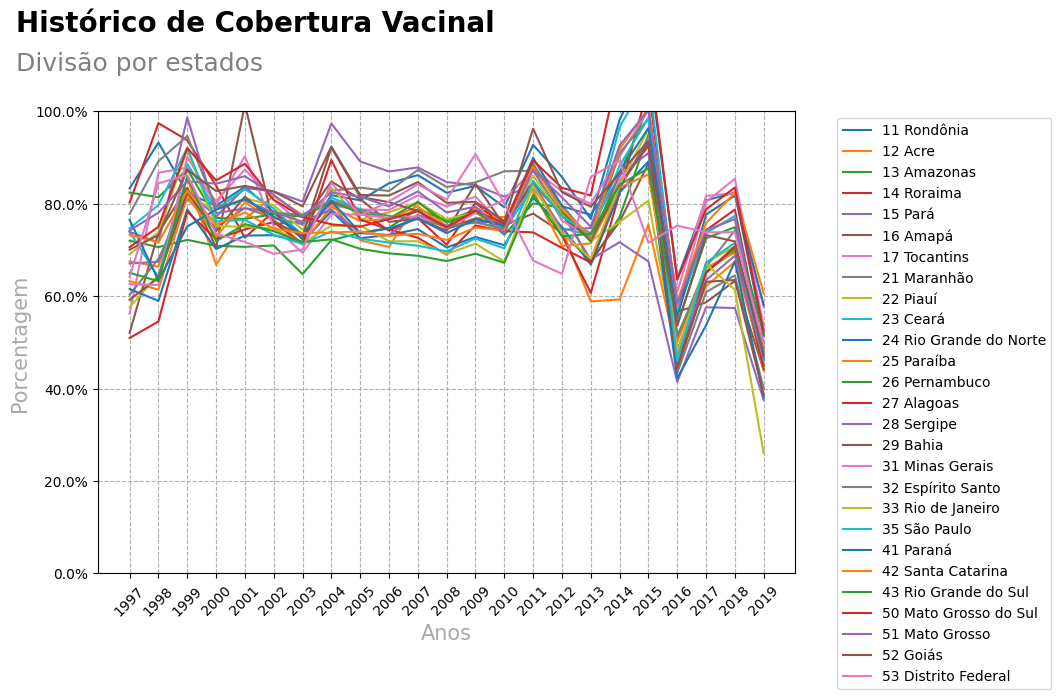

In [ ]:
# Primeira visualização dos dados para ambientar as análises
ax = dados_tratados.plot(figsize=(9,6))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plt.xticks(rotation=45)

formatter = ticker.StrMethodFormatter('{x:}%')
ax.yaxis.set_major_formatter(formatter)
plt.ylim(0, 100)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

title_font = {
    'size': 18,
    'color': 'grey'
}
axis_font = {
    'size': 15,
    'color': 'darkgrey'
}
plt.suptitle('Histórico de Cobertura Vacinal', fontsize=20, x=0.3, y=1.05, fontweight='bold')
plt.title('Divisão por estados', fontdict=title_font, x=0.06, y=1.07)
plt.xlabel('Anos', fontdict=axis_font)
plt.ylabel('Porcentagem', fontdict=axis_font)

plt.grid(linestyle='--')
plt.show()

---
A visualização apresentada exibe graficamente a evolução histórica das coberturas vacinais das unidades da federação, durante o período de 1997 a 2019. 
O eixo x apresenta os anos da série histórica.
O eixo y apresenta as porcentagens de coberturas de 0 a 100%.
As diferentes cores representam as diversas unidades da federação.

Em uma primeira análise, dois pontos causaram estranheza:
- As linhas passam de 100%.
- Houve uma grande redução no ano de 2019, atingindo de modo semelhante todos os estados da federação.

---

Em http://tabnet.datasus.gov.br/cgi/pni/\cpnidescr.htm, foram encontradas definições acerca das variáveis estudadas, as quais deram uma melhor base para os estudos.
Cobertura vacinal considera a quantidade de tratamentos completos de um imunizante em relação à população alvo. 
Entende-se como completamente tratado, aquele indivíduo que recebeu doses suficientes para adquirir a imunidade proposta pela vacina.
A título de exemplo, levando-se em consideração a pandemia "Sars-CoV-2", um indivíduo seria considerado imunizado quando tivesse recebido 2 doses da vacina Coronavac ou 2 da Astrazenica ou 2 da Pfizer ou 1 da Janssen e assim por diante.

Quanto a população alvo citada na definição de cobertura vacinal, a forma de cálculo desta mudou durante a série histórica apresentada, assumindo os seguintes modos:
- De 1994 a 1999: "Estimativas populacionais preliminares do IBGE por município, sexo e faixa etária. Por orientação da CGPNI, não foram utilizados os dados da Contagem Populacional de 1996, mas as estimativas anteriores; mesmo quando as estimativas foram revistas, foi adotada a primeira estimativa feita; por este motivo, a população-alvo não é a mesma disponível nas páginas de População Residente."
- No ano de 2000: 
  - "Para os estados de Alagoas, Amazonas, Bahia, Ceará, Maranhão, Minas Gerais, Mato Grosso, Pará, Paraíba, Piauí, Rondônia e Tocantins: 
    - Dados do Censo Demográfico de 2000, disponíveis nas páginas de População Residente.
  - Para os estados do Acre, Amapá, Espírito Santo, Goiás, Mato Grosso do Sul, Paraná, Pernambuco, Rio de Janeiro, Rio Grande do Norte, Rio Grande do Sul, Roraima, Santa Catarina, São Paulo, Sergipe e do Distrito Federal: 
    - Para a população menor de 1 ano, os dados disponíveis de nascidos vivos, obtidos do SINASC.
    - Para a população de 1 ano, os dados disponíveis de nascidos vivos também do ano 2000, obtidos do SINASC.
    - Para as demais faixas etárias, dados do Censo Demográfico de 2000, disponíveis nas páginas de População Residente."
- De 2001 a 2005:
  - "Para os estados de Alagoas, Amazonas, Bahia, Ceará, Maranhão, Minas Gerais, Mato Grosso, Pará, Paraíba, Piauí, Rondônia e Tocantins:
    - Estimativas populacionais preliminares do IBGE, por município, sexo e faixa etária, baseadas no Censo Demográfico do ano 2000, disponíveis em População Residente.
  - Para os estados do Acre, Amapá, Espírito Santo, Goiás, Mato Grosso do Sul, Paraná, Pernambuco, Rio de Janeiro, Rio Grande do Norte, Rio Grande do Sul, Roraima, Santa Catarina, São Paulo, Sergipe e do Distrito Federal:
    - Para a população menor de 1 ano, os dados disponíveis de nascidos vivos, obtidos do SINASC.
    - Para a população de 1 ano, os dados disponíveis de nascidos vivos do ano anterior, obtidos do SINASC.
    - Para as demais faixas etárias, as estimativas populacionais preliminares do IBGE, por município, sexo e faixa etária, baseadas no Censo Demográfico de 2000, disponíveis em População Residente.
    - Os dados do SINASC podem sofrer alterações posteriores, as quais nem sempre se refletem na população-alvo considerada. Quando os dados do SINASC de determinado ano não estão disponíveis, são utilizados os dados do ano anterior." 
- A partir de 2006, para todos os estados: 
  - "Para a população menor de 1 ano e 1 ano, os dados disponíveis de nascidos vivos, obtidos do SINASC.
  - Para as demais faixas etárias, as estimativas populacionais preliminares do IBGE, por município, sexo e faixa etária, baseadas no Censo Demográfico de 2000, disponíveis em População Residente."

---

Logo, pode-se perceber:
- Dependendo da forma como é contada a população alvo do programa, pode-se ter imunizado uma quantidade maior de pessoas do que o total da população alvo. 
Uma forma de se produzir tal efeito seria com a vacinação de pessoas não residentes nos municípios ou estados da federação.
O gráfico será reconstruído, aceitando a variação do eixo y até 120%, exibindo as linhas em suas completudes.
- Não houve nenhuma mudança na forma de contagem para o ano de 2019.
Logo, por este ser o último ano da base de dados, admite-se a possibilidade de os dados ainda estarem sendo atualizados. 
De modo que, ainda serão somados dados, elevando posteriormente os índices para tal ano.
A partir desta teoria, serão eliminados os dados referentes a 2019.

In [ ]:
# Removendo o ano de 2019
dados_tratados = dados_tratados.drop(2019)
dados_tratados.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2014,98.18,59.29,77.14,82.30,71.71,76.11,85.09,83.27,76.06,96.57,82.44,83.53,86.44,84.08,86.11,83.78,90.21,90.98,84.08,88.20,86.95,91.81,84.15,110.11,92.61,86.63,89.33
2015,111.27,75.54,94.95,105.27,67.51,88.75,92.37,94.40,80.68,107.71,89.17,86.34,101.09,92.74,91.00,93.06,100.33,98.39,96.14,98.63,96.41,100.69,87.69,113.07,100.32,93.55,71.55
2016,63.77,46.91,48.27,57.41,41.43,56.62,60.94,43.38,46.94,56.44,42.23,50.10,51.43,44.88,47.05,44.35,57.58,51.19,47.98,45.94,55.32,58.88,53.86,63.55,58.32,53.60,75.28
2017,80.74,62.18,65.33,74.26,57.60,58.66,81.70,60.87,67.25,73.67,53.69,66.15,65.20,65.01,63.49,63.11,80.42,66.35,67.04,67.29,77.66,75.82,72.54,78.81,74.28,73.25,73.82
2018,82.45,67.44,69.82,78.76,57.44,63.32,82.32,64.51,70.80,77.37,67.54,69.43,70.43,70.79,68.76,63.50,85.42,74.22,61.37,71.52,81.79,82.43,74.94,83.52,76.70,71.85,73.85


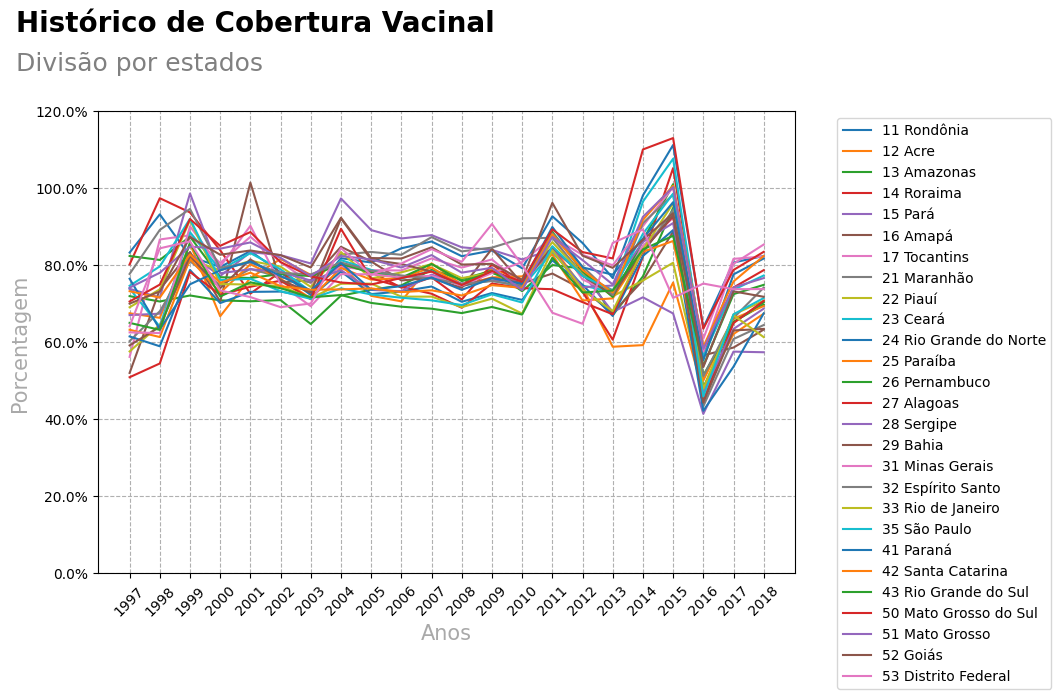

In [ ]:
ax = dados_tratados.plot(figsize=(9,6))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plt.xticks(rotation=45)

formatter = ticker.StrMethodFormatter('{x:}%')
ax.yaxis.set_major_formatter(formatter)
plt.ylim(0, 120)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

title_font = {
    'size': 18,
    'color': 'grey'
}
axis_font = {
    'size': 15,
    'color': 'darkgrey'
}
plt.suptitle('Histórico de Cobertura Vacinal', fontsize=20, x=0.3, y=1.05, fontweight='bold')
plt.title('Divisão por estados', fontdict=title_font, x=0.06, y=1.07)
plt.xlabel('Anos', fontdict=axis_font)
plt.ylabel('Porcentagem', fontdict=axis_font)

plt.grid(linestyle='--')
plt.show()

---
Resposta 1: Como pode ser visto no gráfico, há uma tendência de estabilidade na cobertura vacinal nas unidades da federação em torno de 70 a 80%. Logo, o dado analisado apresenta uma estabilidade e não um crescimento.

---

---
# Pergunta 2: Estados com maiores Índices de Desenvolvimento Humano (IDH) possuem uma cobertura vacinal maior?

---

---
No intuito de responder a pergunta 2, foi necessária a busca por uma série histórica de dados sobre o ranking do Índice de Desenvolvimento Humano (IDH) das unidades da federação.
A referida série foi encontrada no endereço eletrônico http://www.atlasbrasil.org.br/ranking, referente ao serviço de Atlas baseado nos dados providos pelo Instituto Brasileiro de Geografia e Estatística (IBGE).
No entanto, as fontes consultadas forneciam dados apenas sobre os anos de 1991, 2000, 2010, 2016 e 2017, o que reduziu o universo de comparação deste trabalho.

As análises buscaram a obtenção, limpeza e tratamento dos dados referentes ao IDH, com uma posterior construção de gráficos do tipo Scatter Plot para análise da correlação entre os dados.
As células a seguir exibem os procedimentos realizados e, ao final, os gráficos de correlação referentes aos anos de interseção das duas bases (Cobertura Vacinal e IDHM por unidades da federação).

---

In [ ]:
# Consertando os índices da base de cobertura vacinal
historico_cobertura_vacinal = historico_cobertura_vacinal.drop('2019', axis=1)
historico_cobertura_vacinal.index = historico_cobertura_vacinal.index.str[3:]
historico_cobertura_vacinal.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,
Rondônia,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45
Acre,67.56,66.38,85.61,66.79,76.77,81.66,77.54,80.21,72.09,70.66,80.54,75.04,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44
Amazonas,72.01,70.62,72.19,70.91,70.68,70.98,64.77,72.14,73.67,74.81,78.84,76.40,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82
Roraima,80.26,97.45,93.76,83.94,72.67,78.33,72.99,80.28,78.26,74.22,76.90,71.13,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76
Pará,67.09,67.46,82.95,77.23,83.43,82.66,80.50,97.38,89.17,86.99,87.87,84.70,84.02,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44


In [ ]:
# Leitura das bases de IDHM obtidas em:
# http://www.atlasbrasil.org.br/ranking
rename_dict = {'Territorialidade':'Unidade da Federação'}
columns_to_drop = [
                   'Posição IDHM', 
                   'Posição IDHM Renda', 
                   'IDHM Renda',
                   'Posição IDHM Educação', 
                   'IDHM Educação', 
                   'Posição IDHM Longevidade', 
                   'IDHM Longevidade'
                   ]

def get_and_clear_dataframe(link, year):
  idhm = pd.read_excel(link)
  idhm = idhm.rename(columns=rename_dict)
  idhm = idhm.rename(columns={'IDHM': str(year)})
  idhm = idhm.drop(columns=columns_to_drop)
  idhm = idhm.set_index('Unidade da Federação')
  return idhm


idhm_1991 = get_and_clear_dataframe('https://github.com/arvieira/bootcamp_modulo_02/blob/main/dados/1991.xlsx?raw=true', 1991)
idhm_2000 = get_and_clear_dataframe('https://github.com/arvieira/bootcamp_modulo_02/blob/main/dados/2000.xlsx?raw=true', 2000)
idhm_2010 = get_and_clear_dataframe('https://github.com/arvieira/bootcamp_modulo_02/blob/main/dados/2010.xlsx?raw=true', 2010)
idhm_2016 = get_and_clear_dataframe('https://github.com/arvieira/bootcamp_modulo_02/blob/main/dados/2016.xlsx?raw=true', 2016)
idhm_2017 = get_and_clear_dataframe('https://github.com/arvieira/bootcamp_modulo_02/blob/main/dados/2017.xlsx?raw=true', 2017)
idhm = idhm_1991.join(idhm_2000).join(idhm_2010).join(idhm_2016).join(idhm_2017)
idhm.head()

,1991,2000,2010,2016,2017
Unidade da Federação,,,,,
Distrito Federal,0.616,0.725,0.824,0.854,0.850
São Paulo,0.578,0.702,0.783,0.831,0.826
Rio de Janeiro,0.573,0.664,0.761,0.794,0.796
Santa Catarina,0.543,0.674,0.774,0.805,0.808
Rio Grande do Sul,0.542,0.664,0.746,0.783,0.787


In [ ]:
# Quero colocar um scatterplot com x=IDH, y=cobertura vacinal, plotando um
# ponto para cada estado. Serão feitos 4 scatterplots, um para cada ano dos dados.
# A conclusão será em cima do posicionamento dos pontos e a correlação das 
# variáveis.
# Exemplo: sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')

def plot_correlation(year, color='blue'):
  year = str(year)
  correlacao = pd.DataFrame()
  correlacao['Cobertura Vacinal'] = historico_cobertura_vacinal[year]
  correlacao = correlacao.join(idhm[year])
  correlacao = correlacao.rename(columns={year:'IDHM'})  
  sns.lmplot(x='IDHM', y='Cobertura Vacinal', data=correlacao, line_kws={'color': 'red'}, scatter_kws={'color': color})
  plt.suptitle('Correlação Cobertura Vacinal x IDHM', fontsize=20, x=0.6, y=1.11, fontweight='bold')
  plt.title(f'Referente ao Ano de {year}', fontdict=title_font, x=0.28)
  plt.xlabel('IDHM', fontdict=axis_font)
  plt.ylabel('Cobertura Vacinal', fontdict=axis_font)

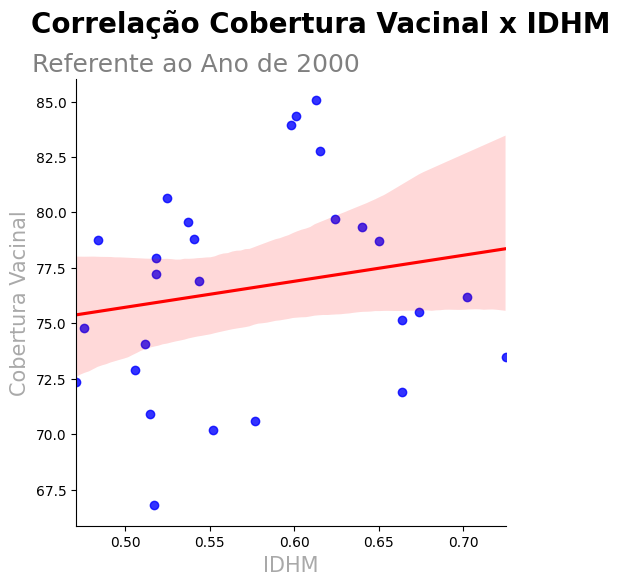

In [ ]:
# Gráfico de correlação do ano de 2000
plot_correlation(2000)

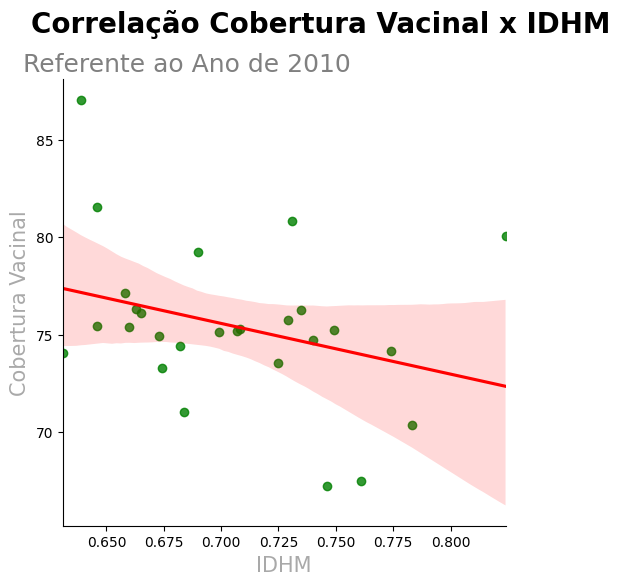

In [ ]:
# Gráfico de correlação do ano de 2010
plot_correlation(2010, 'green')

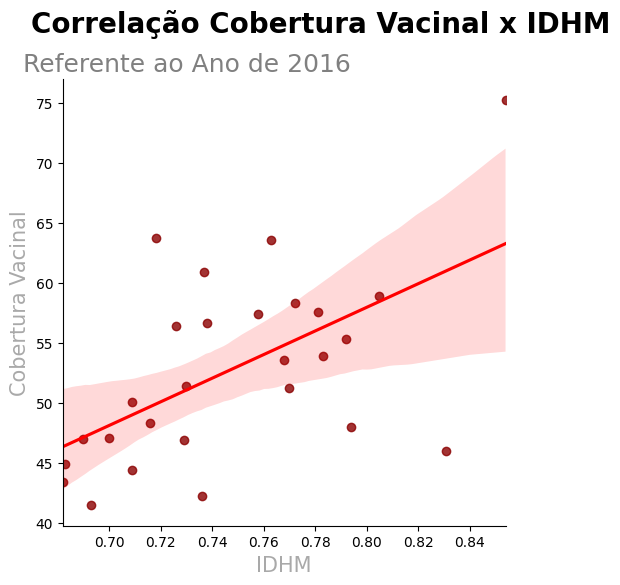

In [ ]:
# Gráfico de correlação do ano de 2016
plot_correlation(2016, 'darkred')

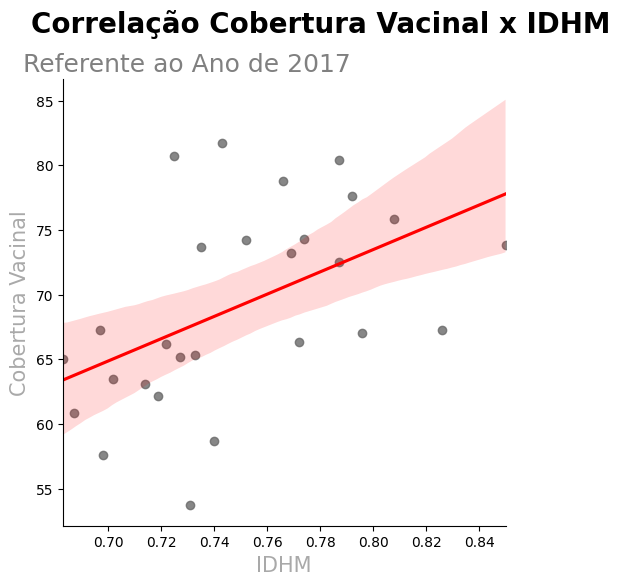

In [ ]:
# Gráfico de correlação do ano de 2017
plot_correlation(2017, 'dimgrey')

---
Resposta 2: Mediante as análises dos gráficos anteriormente exibidos, pode-se concluir que quanto maior o IDHM de uma unidade da federação, há uma tendência de se ter uma maior cobertura vacinal. 
No entanto, foram obtidos apenas 4 anos para fins de comparação e a nuvem de pontos se encontra ligeiramente espalhada, possuindo em sua maioria, uma linha de tendência crescente.
Isto posto, se faz necessário uma nova comparação com um maior número de anos para afirmações mais precisas, mas a princípio, devido ao espalhamento dos pontos, a dúvida permanece.

---

---
# Pergunta 3: Estados com uma maior população tendem a possuir uma cobertura vacinal menor por necessitar maiores campanhas de vacinação e um maior número de doses a serem aplicadas?

---

---
Para a resposta dessa pergunta, se faz necessária a busca por dados populacionais.
Foi utilizado como fonte dos dados o site eletrônico do Instituto Brasileiro de Geografia e Estatística (IBGE - https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?edicao=17283&t=downloads).
Foi obtido uma série histórica de dados estimados das populações das unidades da federação de 1997 a 2019, tendo parte desses dados como fonte o Tribunal de Contas da União.
A seguir, é apresentada a obtenção, extração e limpeza dos referidos dados, de modo que eles fiquem semelhantes ao histórico de cobertura vacinal já apresentado, para o trabalho de análise.

---

In [ ]:
# Histórico de cobertura vacinal já apresentado
historico_cobertura_vacinal.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,
Rondônia,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45
Acre,67.56,66.38,85.61,66.79,76.77,81.66,77.54,80.21,72.09,70.66,80.54,75.04,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44
Amazonas,72.01,70.62,72.19,70.91,70.68,70.98,64.77,72.14,73.67,74.81,78.84,76.40,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82
Roraima,80.26,97.45,93.76,83.94,72.67,78.33,72.99,80.28,78.26,74.22,76.90,71.13,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76
Pará,67.09,67.46,82.95,77.23,83.43,82.66,80.50,97.38,89.17,86.99,87.87,84.70,84.02,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44


In [ ]:
# https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?edicao=17283&t=downloads
# Limpando primeira parte da aquisição de dados
# Nos anos de 1997, 1998 e 1999, os dados eram fornecidos de modo semelhante. De modo
# que puderam ser tratados do mesmo modo

correct_dict = {
    'Rio Grande Do Norte': 'Rio Grande do Norte',
    'Rio De Janeiro': 'Rio de Janeiro',
    'Rio Grande Do Sul': 'Rio Grande do Sul',
    'Mato Grosso Do Sul': 'Mato Grosso do Sul',
    'Pernanbuco': 'Pernambuco'
}

def correct_map(populacao):
  if populacao in correct_dict.keys():
    return correct_dict[populacao]
  else:
    return populacao

def get_and_clear_population(link, skipfooter=0):
  populacao = pd.read_csv(link, decimal=',', thousands='.', skipfooter=skipfooter)
  populacao['Unidade da Federação'] = populacao['Unidade da Federação'].str.title()
  populacao['Unidade da Federação'] = populacao['Unidade da Federação'].map(correct_map)
  populacao['Unidade da Federação'].iloc[9] = populacao['Unidade da Federação'].iloc[9].strip()
  return populacao

populacao_1997 = get_and_clear_population('https://raw.githubusercontent.com/arvieira/bootcamp_modulo_02/main/dados/populacao1997.csv')
populacao_1998 = get_and_clear_population('https://raw.githubusercontent.com/arvieira/bootcamp_modulo_02/main/dados/populacao1998.csv', skipfooter=1)
populacao_1999 = get_and_clear_population('https://raw.githubusercontent.com/arvieira/bootcamp_modulo_02/main/dados/populacao1999.csv', skipfooter=1)


uf_dict = {
    'AC': 'Acre', 
    'AL': 'Alagoas', 
    'AM': 'Amazonas', 
    'AP': 'Amapá', 
    'BA': 'Bahia', 
    'CE': 'Ceará', 
    'DF': 'Distrito Federal', 
    'ES': 'Espírito Santo', 
    'GO': 'Goiás', 
    'MA': 'Maranhão', 
    'MG': 'Minas Gerais', 
    'MS': 'Mato Grosso do Sul',
    'MT': 'Mato Grosso', 
    'PA': 'Pará', 
    'PB': 'Paraíba', 
    'PE': 'Pernambuco', 
    'PI': 'Piauí', 
    'PR': 'Paraná', 
    'RJ': 'Rio de Janeiro', 
    'RN': 'Rio Grande do Norte', 
    'RO': 'Rondônia', 
    'RR': 'Roraima', 
    'RS': 'Rio Grande do Sul', 
    'SC': 'Santa Catarina',
    'SE': 'Sergipe', 
    'SP': 'São Paulo', 
    'TO': 'Tocantins'
}


# No ano de 2000, os dados passaram a ser apresentados por município, o que tornou
# necessário o argupamento e soma da população por unidade da federação.
populacao_2000 = pd.read_csv('https://raw.githubusercontent.com/arvieira/bootcamp_modulo_02/main/dados/populacao2000.csv', decimal=',', thousands='.')
populacao_2000 = populacao_2000.drop(['CodUF', 'CodMun', 'Municipio', 'Unnamed: 5'], axis=1).groupby('UF').sum()
populacao_2000 = populacao_2000.reset_index()
populacao_2000 = populacao_2000.rename(columns={'UF': 'Unidade da Federação'})
populacao_2000['Unidade da Federação'] = populacao_2000['Unidade da Federação'].map(uf_dict)
populacao_2000 = populacao_2000.set_index('Unidade da Federação')
populacao_2000.info()


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Acre to Tocantins
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   População  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [ ]:
# Pegando a série dos anos seguintes
# De 2001 a 2019, os dados foram apresentados como um único arquivo com dados do
# TCU, o qual necessitou um tratamento e limpeza completamente diferente dos anos
# anteriores.
populacao_2001_2019 = pd.read_csv(
    'https://raw.githubusercontent.com/arvieira/bootcamp_modulo_02/main/dados/populacao_2001_2019_TCU.csv',
    skiprows=4,
    skipfooter=10,
    decimal=',',
    thousands='.'
    )
populacao_2001_2019 = populacao_2001_2019.drop([0, 1, 2, 10, 20, 25, 29])
populacao_2001_2019 = populacao_2001_2019.rename(columns={'Unidades da Federação': 'Unidade da Federação'})
populacao_2001_2019 = populacao_2001_2019.set_index('Unidade da Federação')
populacao_2001_2019 = populacao_2001_2019.astype('int64')
populacao_2001_2019.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,,,,,,,
Rondônia,1407886,1431777,1455907,1562085,1534594,1562417,1453756,1493566,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225
Acre,574355,586942,600595,630328,669736,686652,655385,680073,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935
Amazonas,2900240,2961801,3031068,3138726,3232330,3311026,3221940,3341096,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597
Roraima,337237,346871,357302,381896,391317,403344,395725,412783,421499,451227,460165,469524,488072,496936,505665,514229,522636,576568,605761
Pará,6341736,6453683,6574993,6850181,6970586,7110465,7065573,7321493,7431020,7603239,7688593,7792561,7969654,8073924,8175113,8272724,8366628,8513497,8602865


In [ ]:
# Juntando todos os dados de população
historico_populacao = populacao_1997
historico_populacao = historico_populacao.rename(columns={'População': 1997})
historico_populacao['1998'] = populacao_1998['População']
historico_populacao['1999'] = populacao_1999['População']
historico_populacao = historico_populacao.set_index('Unidade da Federação')
historico_populacao = historico_populacao.join(populacao_2000)
historico_populacao = historico_populacao.rename(columns={'População': 2000})
historico_populacao = historico_populacao.join(populacao_2001_2019)

# Dados de população
historico_populacao.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,1255522,1276173,1296856,1317614,1407886,1431777,1455907,1562085,1534594,1562417,1453756,1493566,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225
Acre,500185,514050,527937,541873,574355,586942,600595,630328,669736,686652,655385,680073,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935
Amazonas,2460602,2520684,2580860,2641251,2900240,2961801,3031068,3138726,3232330,3311026,3221940,3341096,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597
Roraima,254499,260705,266922,273160,337237,346871,357302,381896,391317,403344,395725,412783,421499,451227,460165,469524,488072,496936,505665,514229,522636,576568,605761
Pará,5650681,5768476,5886454,6004854,6341736,6453683,6574993,6850181,6970586,7110465,7065573,7321493,7431020,7603239,7688593,7792561,7969654,8073924,8175113,8272724,8366628,8513497,8602865


In [ ]:
# Recapitulando: Dados de cobertura vacinal
historico_cobertura_vacinal.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,
Rondônia,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45
Acre,67.56,66.38,85.61,66.79,76.77,81.66,77.54,80.21,72.09,70.66,80.54,75.04,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44
Amazonas,72.01,70.62,72.19,70.91,70.68,70.98,64.77,72.14,73.67,74.81,78.84,76.40,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82
Roraima,80.26,97.45,93.76,83.94,72.67,78.33,72.99,80.28,78.26,74.22,76.90,71.13,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76
Pará,67.09,67.46,82.95,77.23,83.43,82.66,80.50,97.38,89.17,86.99,87.87,84.70,84.02,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44


---
Com as séries históricas de dados de coberturas vacinais e populacionais em mãos, as análises buscaram uma lista ordenada das unidades da federação com maio população em formato descendente.
A referida lista foi encontrada no site https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o.
O objetivo desta busca foi comparar as séries dos estados de maior população com as dos estados de menor população.
Para tanto, foram selecionados os 3 estados de maior população: São Paulo, Minas Gerais e Rio de Janeiro.
Assim como os 3 estados de menor população: Acre, Amapá e Roraima.

Os gráficos subsequêntes apresentam as séries históricas e coberturas vacinais das referidas unidades da federação.
Sendo apresentado em azul aqueles estados cujas posições no ranking de unidades de maior população, figuram entre os 3 primeiros.
Em vermelho, estão apresentados as unidades que se localizam em as 3 menores populações.

---

In [ ]:
# Ranking de população dos estados 
# https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o
# Pegando os 3 primeiros e os 3 últimos para analisar

# Função para plotagem dos gráficos de população e cobertura vacinal
def plot_populacao_cobertura(
    estado='São Paulo', color='blue', 
    title_one='Título1', xlabel_one='Título X', ylabel_one='Título Y',
    title_two='Título2', xlabel_two='Título X', ylabel_two='Título Y'):
  title_font = {
    'size': 18,
    'color': 'black'
  }
  axis_font = {
      'size': 15,
      'color': 'gray'
  }

  fig, axs = plt.subplots(2)
  fig.set_size_inches(8,8)
  fig.tight_layout(pad=6.0)
  axs[0].plot(historico_populacao.loc[estado]/1000000, color=color)
  axs[0].set_ylim([0,50])
  axs[0].xaxis.set_major_locator(ticker.IndexLocator(base=5, offset=0))
  milhao_formatter = ticker.StrMethodFormatter('{x:}M')
  axs[0].yaxis.set_major_formatter(milhao_formatter)
  axs[0].set_title(title_one, fontdict=title_font)
  axs[0].set_xlabel(xlabel_one, fontdict=axis_font)
  axs[0].set_ylabel(ylabel_one, fontdict=axis_font)

  axs[1].plot(historico_cobertura_vacinal.loc[estado], color=color)
  axs[1].set_ylim([0,120])
  axs[1].xaxis.set_major_locator(ticker.IndexLocator(base=5, offset=0))
  porcento_formatter = ticker.StrMethodFormatter('{x:}%')
  axs[1].yaxis.set_major_formatter(porcento_formatter)
  axs[1].set_title(title_two, fontdict=title_font)
  axs[1].set_xlabel(xlabel_two, fontdict=axis_font)
  axs[1].set_ylabel(ylabel_two, fontdict=axis_font)


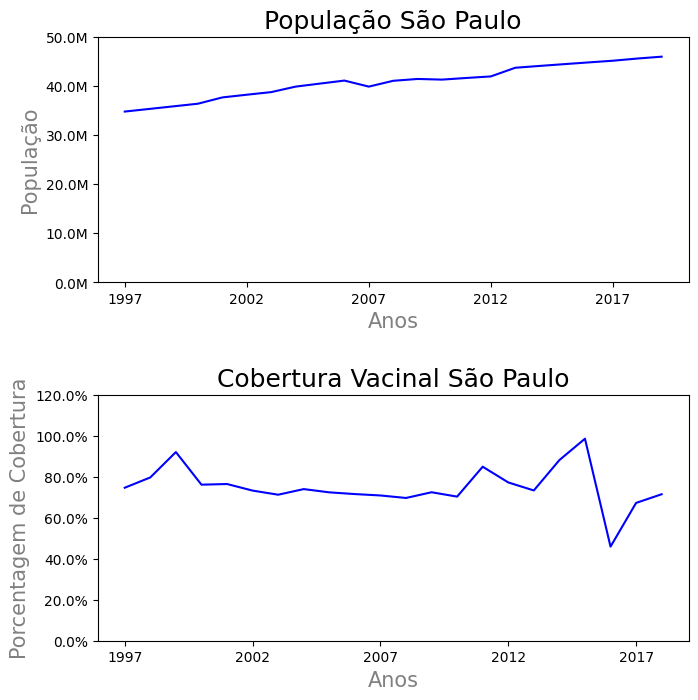

In [ ]:
# Primeiro com maior população
plot_populacao_cobertura('São Paulo', 'blue', 
                         'População São Paulo', 'Anos', 'População',
                         'Cobertura Vacinal São Paulo', 'Anos', 'Porcentagem de Cobertura')

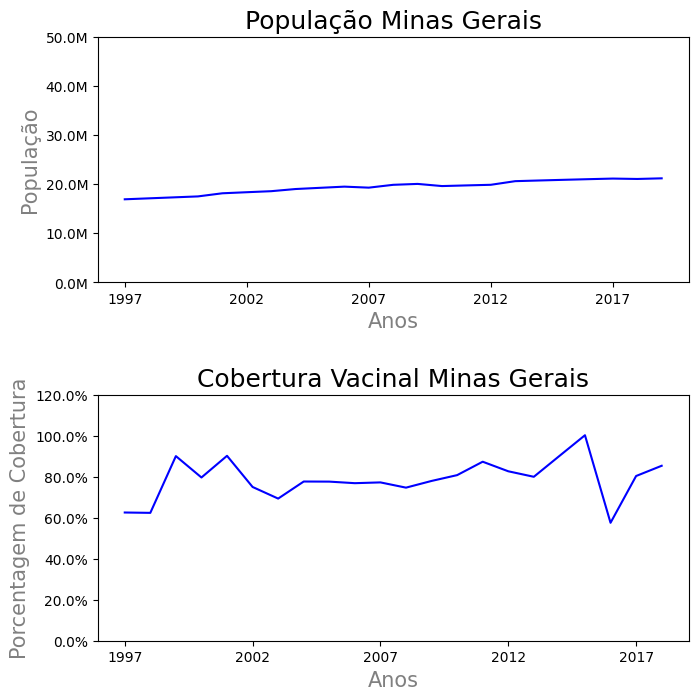

In [ ]:
# Segundo com maior população
plot_populacao_cobertura('Minas Gerais', 'blue',
                         'População Minas Gerais', 'Anos', 'População',
                         'Cobertura Vacinal Minas Gerais', 'Anos', 'Porcentagem de Cobertura')

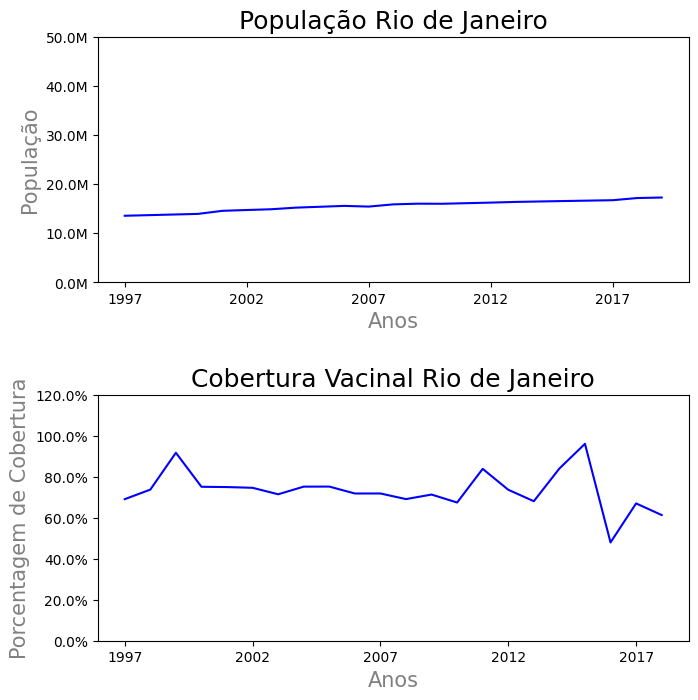

In [ ]:
# Terceiro com maior população
plot_populacao_cobertura('Rio de Janeiro', 'blue',
                         'População Rio de Janeiro', 'Anos', 'População',
                         'Cobertura Vacinal Rio de Janeiro', 'Anos', 'Porcentagem de Cobertura')

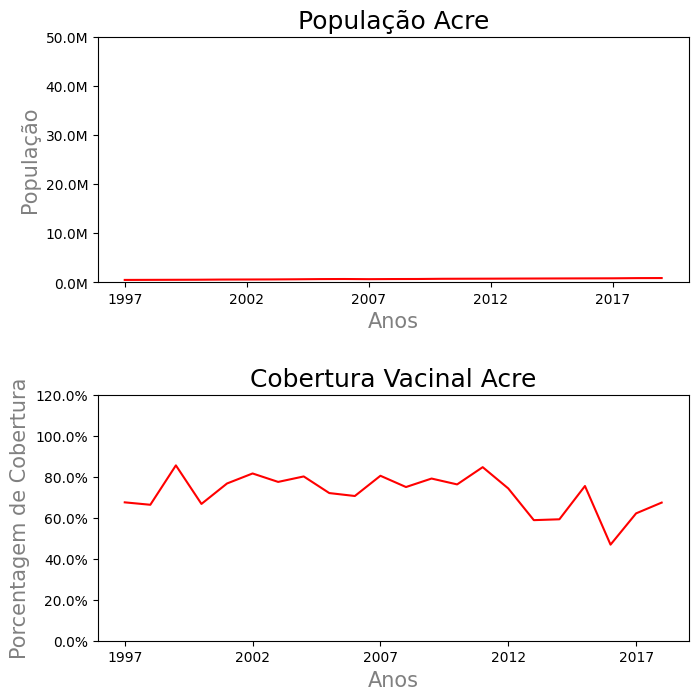

In [ ]:
# Antepenúltimo com maior população
plot_populacao_cobertura('Acre', 'red',
                         'População Acre', 'Anos', 'População',
                         'Cobertura Vacinal Acre', 'Anos', 'Porcentagem de Cobertura')

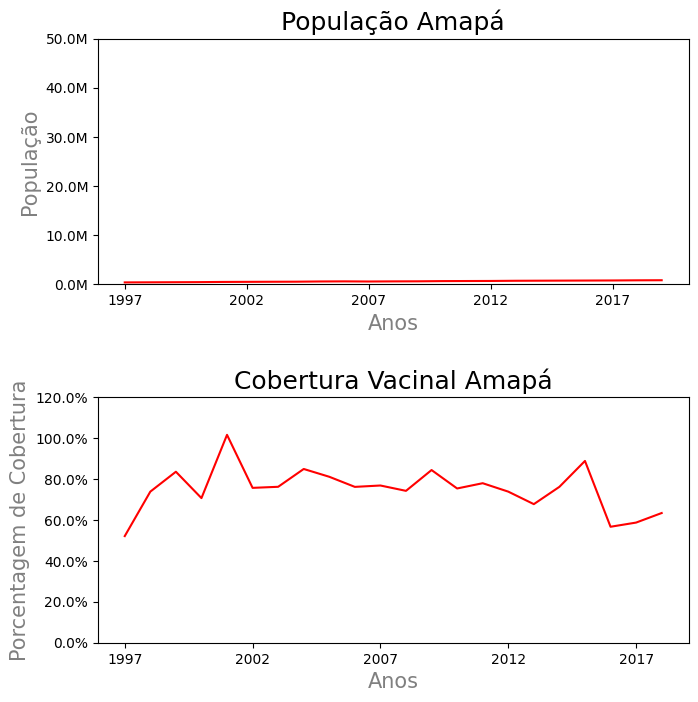

In [ ]:
# Penúltimo com maior população
plot_populacao_cobertura('Amapá', 'red',
                         'População Amapá', 'Anos', 'População',
                         'Cobertura Vacinal Amapá', 'Anos', 'Porcentagem de Cobertura')

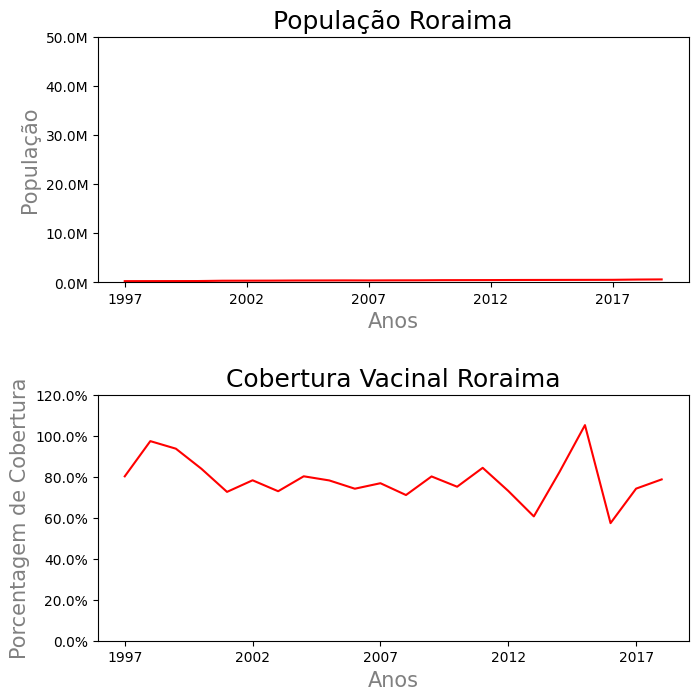

In [ ]:
# Último com maior população
plot_populacao_cobertura('Roraima', 'red',
                         'População Roraima', 'Anos', 'População',
                         'Cobertura Vacinal Roraima', 'Anos', 'Porcentagem de Cobertura')

---
Os três gráficos a seguir possuem o objetivo de efetivar a referida comparação de coberturas vacinais entre estados de maior e menor população.
Em cada gráfico, são apresentadas duas linhas representando as séries históricas de coberturas vacinais, sendo apresentado aos pares do primeiro com o último, o segundo com o penúltimo e o terceiro com o antepenúltimo estado de maior população.

---

In [ ]:
def plot_comparativo(dados, subtitle):
  plt.figure(figsize=(10,6))
  ax = dados.T.plot()
  porcentagem_formatter = ticker.StrMethodFormatter('{x:}%')
  ax.yaxis.set_major_formatter(porcentagem_formatter)

  title_font = {
      'size': 18,
      'color': 'grey'
  }
  axis_font = {
      'size': 15,
      'color': 'darkgrey'
  }
  plt.suptitle('Histórico de Cobertura Vacinal', fontsize=20, x=0.4, y=1.07, fontweight='bold')
  plt.title(subtitle, fontdict=title_font, x=0.13, y=1.06)
  plt.xlabel('Anos', fontdict=axis_font)
  plt.ylabel('Porcentagem', fontdict=axis_font)
  plt.ylim(0, 120)
  plt.show()

<Figure size 1000x600 with 0 Axes>

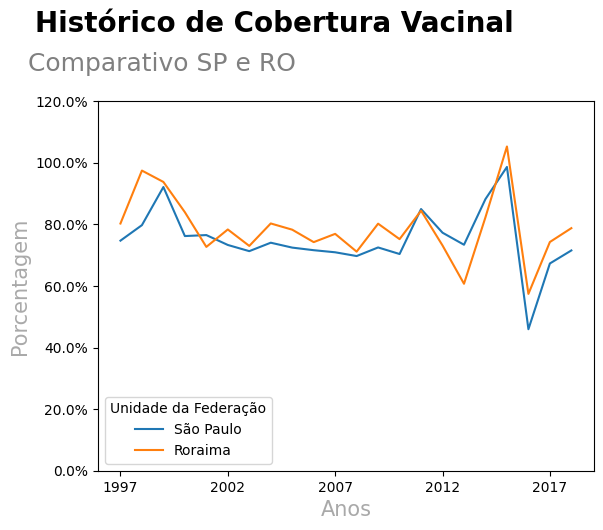

In [ ]:
# Comparando primeiro e último
plot_comparativo(historico_cobertura_vacinal.loc[['São Paulo', 'Roraima']], 'Comparativo SP e RO')

<Figure size 1000x600 with 0 Axes>

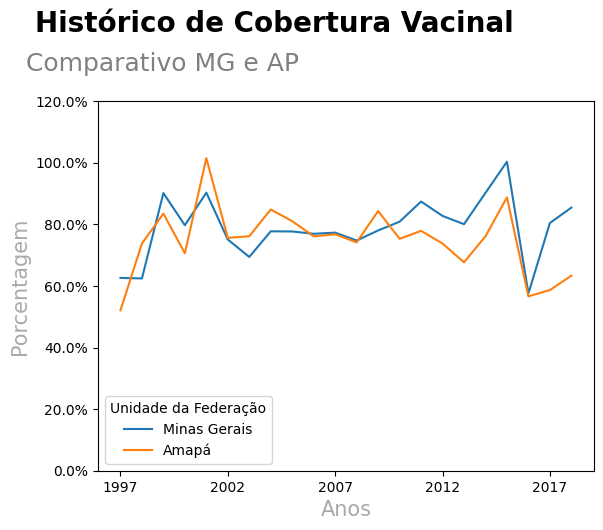

In [ ]:
# Comparando segundo e penúltimo
plot_comparativo(historico_cobertura_vacinal.loc[['Minas Gerais', 'Amapá']], 'Comparativo MG e AP')

<Figure size 1000x600 with 0 Axes>

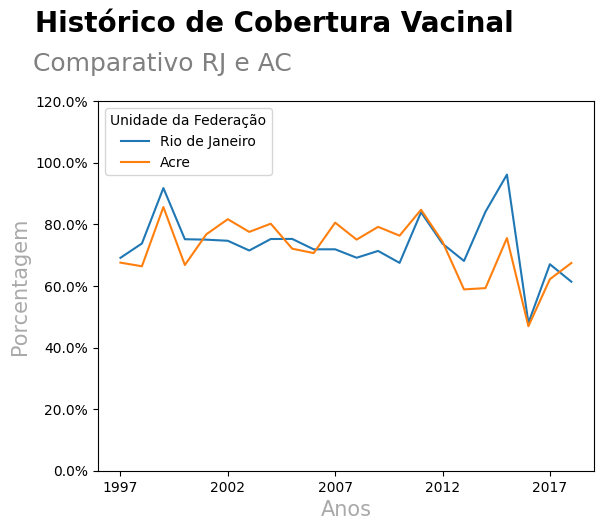

In [ ]:
# Comparando terceiro e antepenúltimo
plot_comparativo(historico_cobertura_vacinal.loc[['Rio de Janeiro', 'Acre']], 'Comparativo RJ e AC')

---
Resposta 3: Ante o exposto nos três últimos gráficos, pode-se concluir que as séries históricas das coberturas vacianais das unidades da federação de maior população e de menor população são semelhantes.
Inclusive, há determinados anos que o estado de maior população possui uma melhor cobertura vacinal e outros que possui uma pior.
Isto posto, conclui-se que o tamanho da população de um estado não influi diretamente na sua cobertura vacinal.


---

---
# Pergunta 4: Estados menos populosos, nos quais os habitantes ficam mais isolados, possuem uma cobertura vacinal menor?

---

---
Para a resposta dessa pergunta, é necessária a aquisição da área das unidades da federação.
Desse modo, é possibilitada a divisão da quantidade de habitantes pela área geográfica, indicando o número de habitantes por km2 de cada estado.

Com esse valor em mãos, serão feitas dois tipos de análises diferentes.
No primeiro tipo, a série histórica de cobertura vacinal dos estados será dividido pelo quanto populoso ele é, produzindo um valor na unidade porcento/km2.
É de se ressaltar, que esta medida irá produzir um resultado que induzirá o leitor ao erro e será explicado mais adiante.
No segundo tipo de análise, é exibido um ranking de populosidade dos estados e, em seguida, são comparados aqueles mais populosos com os menos.
Esta segunda comparação irá desmascarar as conclusões retiradas pela primeira análise indicada.

---

In [ ]:
# Extraindo os dados de área dos estados diretamente do site da wikipedia
# Limpeza dos dados
area_estados = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_%C3%A1rea')[0]
area_estados = area_estados.drop(['Posição', '% doBrasil', 'País comparável'], axis=1)
area_estados = area_estados.rename(columns={'Unidade federativa': 'Unidade da Federação', 'Área (km²)': 'Área'})
area_estados['Área'] = area_estados['Área'].str.replace(r"\s", "")
area_estados['Área'] = area_estados['Área'].str.replace(",", ".").astype('float64')
area_estados = area_estados.set_index('Unidade da Federação')
area_estados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Amazonas to Distrito Federal
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Área    27 non-null     float64
dtypes: float64(1)
memory usage: 432.0+ bytes


In [ ]:
# Dataframe obtido
area_estados.head()

,Área
Unidade da Federação,
Amazonas,1559167.889
Pará,1245870.798
Mato Grosso,903207.019
Minas Gerais,586521.123
Bahia,564760.427


In [ ]:
# Dividindo o dataframe de habitantes pela série de áreas dos estados
# Obtendo habitantes por km2 de cada estado
historico_populoso = pd.DataFrame()

for year in historico_populacao.columns:
  serie = []
  
  for index in historico_populacao[year].index:
    serie.append((historico_populacao[year][index] / area_estados.loc[index])['Área'])
  
  historico_populoso[year] = serie

historico_populoso.index = historico_populacao.index
historico_populoso = historico_populoso.drop('2019', axis=1)
historico_populoso.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,
Rondônia,5.280511,5.367366,5.454355,5.541659,5.921328,6.021810,6.123296,6.569863,6.454240,6.571259,6.114250,6.281684,6.325264,6.563201,6.630301,6.687315,7.268573,7.354023,7.436764,7.516990,7.594836,7.392119
Acre,3.047605,3.132084,3.216697,3.301608,3.499519,3.576211,3.659399,3.840560,4.080672,4.183740,3.993232,4.143654,4.211036,4.464875,4.547697,4.623249,4.730954,4.814050,4.895769,4.976038,5.054832,5.296393
Amazonas,1.578151,1.616685,1.655280,1.694013,1.860120,1.899604,1.944029,2.013078,2.073112,2.123585,2.066448,2.142871,2.176397,2.232561,2.269407,2.303142,2.442278,2.484494,2.525922,2.566540,2.606271,2.617172
Roraima,1.137962,1.165712,1.193510,1.221403,1.507915,1.550993,1.597634,1.707603,1.749728,1.803505,1.769437,1.845710,1.884683,2.017608,2.057573,2.099421,2.182356,2.221990,2.261021,2.299314,2.336905,2.578055
Pará,4.535527,4.630076,4.724771,4.819805,5.090204,5.180058,5.277428,5.498308,5.594951,5.707225,5.671192,5.876607,5.964519,6.102751,6.171260,6.254710,6.396854,6.480547,6.561766,6.640114,6.715486,6.833371


In [ ]:
# Realizando uma última limpeza de dados e dividindo a cobertura vacinal pelo 
# quão populoso cada estado é.
historico_populoso = historico_populoso.rename(columns={1997: '1997', 2000: '2000'})
historico_cobertura_relativa_populoso = historico_cobertura_vacinal / historico_populoso
historico_cobertura_relativa_populoso.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,
Acre,22.168228,21.193558,26.614260,20.229536,21.937298,22.834220,21.189274,20.884973,17.666210,16.889195,20.169128,18.109618,18.802972,17.093423,18.633609,16.081763,12.443578,12.316033,15.429650,9.427180,12.301102,12.733194
Alagoas,0.532699,0.564714,0.803526,0.735742,0.725657,0.733126,0.679558,0.835885,0.707181,0.679049,0.665915,0.614277,0.664387,0.660904,0.653790,0.619674,0.567674,0.704773,0.772894,0.372022,0.536193,0.593179
Amapá,18.454174,24.974380,27.044050,21.926653,28.994922,20.855731,20.279711,22.078544,19.413444,17.606523,18.620553,17.229007,19.169386,16.045535,16.214346,15.044429,13.115135,14.440373,16.492274,10.311576,10.476500,10.875604
Amazonas,45.629354,43.681967,43.611947,41.859178,37.997540,37.365690,33.317400,35.835677,35.535944,35.228159,38.152416,35.653099,36.128512,32.832254,35.291153,34.379123,27.457975,31.048578,37.590239,18.807421,25.066465,26.677648
Bahia,2.631454,2.813855,3.583811,3.185125,3.485808,3.230906,3.064322,3.805363,3.330432,3.253310,3.145341,2.903911,2.962054,3.037392,3.394363,3.080908,2.713784,3.128022,3.456777,1.639578,2.322797,2.421064


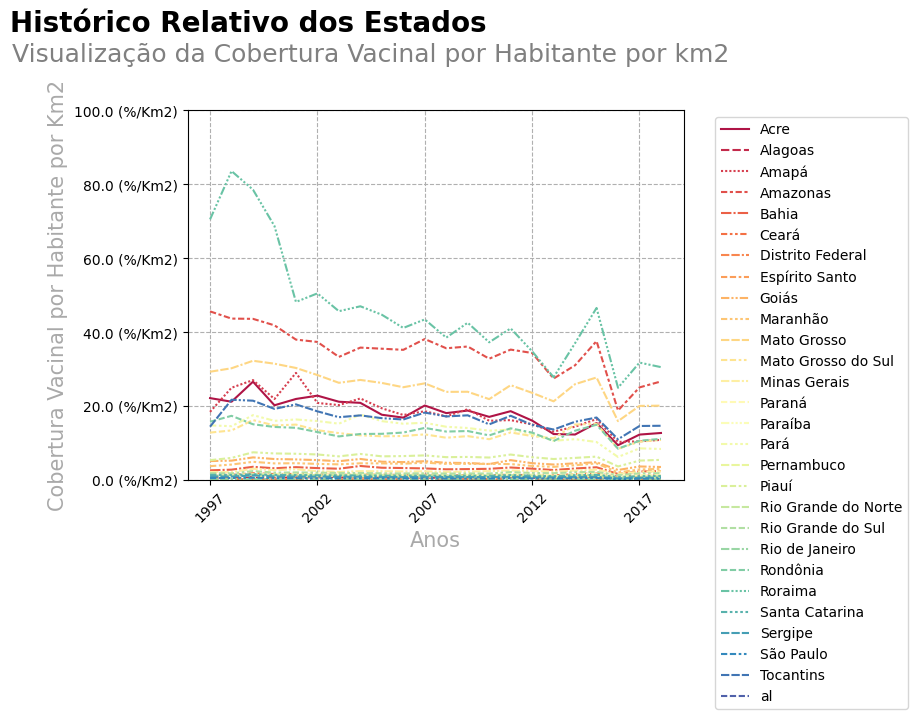

In [ ]:
# Construindo o gráfico que induzirá o leitor ao erro

ax = sns.lineplot(data=historico_cobertura_relativa_populoso.T, palette='Spectral')
#ax = historico_cobertura_relativa_populoso.T.plot(figsize=(9,6))
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.xticks(rotation=45)

formatter = ticker.StrMethodFormatter('{x:} (%/Km2)')
ax.yaxis.set_major_formatter(formatter)
plt.ylim(0, 100)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

title_font = {
    'size': 18,
    'color': 'grey'
}
axis_font = {
    'size': 15,
    'color': 'darkgrey'
}
plt.suptitle('Histórico Relativo dos Estados', fontsize=20, x=0.22, y=1.09, fontweight='bold')
plt.title('Visualização da Cobertura Vacinal por Habitante por km2', fontdict=title_font, x=0.37, y=1.11)
plt.xlabel('Anos', fontdict=axis_font)
plt.ylabel('Cobertura Vacinal por Habitante por Km2', fontdict=axis_font)

plt.grid(linestyle='--')
plt.show()

---
O gráfico anterior apresenta a cobertura vacinal dividida pelo quão populoso é cada unidade da federação, em porcentagem por km2.
A primeira impressão passada pelo gráfico é que estados como Amazonas, Roraima e Mato Grosso possuem melhores coberturas vacinais, uma vez que são os menos populosos.
Isso induz o leitor médio à conclusão errônea de que estados menos populosos possuem uma melhor cobertura vacinal. 
Ou seja, caso meus habitantes estejam mais afastados, mais fácil será o procedimento de imunização daquelas pessoas.

No entanto, a seguir há a exibição dos dados de quão populoso eram os estados em 2018, assim como a cobertura vacinal no mesmo ano.
Olhando essas listas, podemos ver Roraima como o estado menos populoso e o Distrito Federal como o mais populoso.
Ao mesmo tempo, vemos que a cobertura vacinal de Roraima foi de 78,76% e a do Distrito Federal foi de 73,85%, o que os colocam muito próximos.
O mesmo pode ser analisados para os seguintes estados:

Amazonas = 69,82%

Mato Grosso = 76,70%

Rio de Janeiro = 61,37%

São Paulo = 71,52%

Para uma analise mais completa, os 6 estados citados terão os históricos de suas coberturas vacinais exibidos em um mesmo gráfico de linha a seguir.

---

In [ ]:
# Ranking de estados populosos 2018
historico_populoso['2018'].sort_values(ascending=True)

Unidade da Federação
Roraima                  2.578055
Amazonas                 2.617172
Mato Grosso              3.810863
Acre                     5.296393
Tocantins                5.605100
Amapá                    5.822205
Pará                     6.833371
Rondônia                 7.392119
Mato Grosso do Sul       7.694407
Piauí                   12.967017
Goiás                   20.344190
Maranhão                21.341489
Bahia                   26.228143
Minas Gerais            35.873665
Rio Grande do Sul       40.217668
Paraná                  56.944281
Ceará                   60.953579
Rio Grande do Norte     65.878361
Paraíba                 70.775477
Santa Catarina          73.910409
Espírito Santo          86.216727
Pernambuco              96.833886
Sergipe                103.911696
Alagoas                119.340042
São Paulo              183.462377
Rio de Janeiro         392.223829
Distrito Federal       516.371299
Name: 2018, dtype: float64

In [ ]:
# Coberturas vacinais 2018
historico_cobertura_vacinal['2018']

Unidade da Federação
Rondônia               82.45
Acre                   67.44
Amazonas               69.82
Roraima                78.76
Pará                   57.44
Amapá                  63.32
Tocantins              82.32
Maranhão               64.51
Piauí                  70.80
Ceará                  77.37
Rio Grande do Norte    67.54
Paraíba                69.43
Pernambuco             70.43
Alagoas                70.79
Sergipe                68.76
Bahia                  63.50
Minas Gerais           85.42
Espírito Santo         74.22
Rio de Janeiro         61.37
São Paulo              71.52
Paraná                 81.79
Santa Catarina         82.43
Rio Grande do Sul      74.94
Mato Grosso do Sul     83.52
Mato Grosso            76.70
Goiás                  71.85
Distrito Federal       73.85
al                     71.99
Name: 2018, dtype: float64

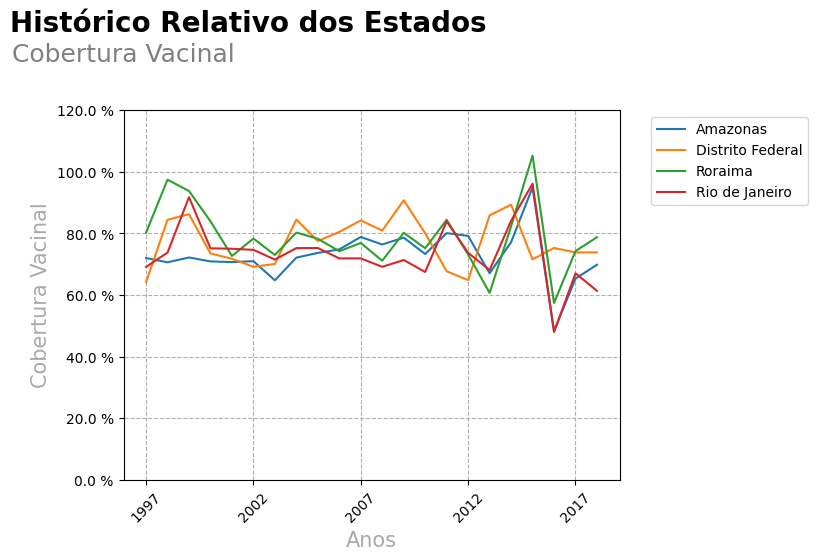

In [ ]:
# Construindo gráfico
historico_cobertura_vacinal.loc['Amazonas'].plot()
historico_cobertura_vacinal.loc['Distrito Federal'].plot()
historico_cobertura_vacinal.loc['Roraima'].plot()
ax = historico_cobertura_vacinal.loc['Rio de Janeiro'].plot()
plt.ylim(0,120)

plt.xticks(rotation=45)
formatter = ticker.StrMethodFormatter('{x:} %')
ax.yaxis.set_major_formatter(formatter)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

title_font = {
    'size': 18,
    'color': 'grey'
}
axis_font = {
    'size': 15,
    'color': 'darkgrey'
}
plt.suptitle('Histórico Relativo dos Estados', fontsize=20, x=0.32, y=1.09, fontweight='bold')
plt.title('Cobertura Vacinal', fontdict=title_font, x=0, y=1.11)
plt.xlabel('Anos', fontdict=axis_font)
plt.ylabel('Cobertura Vacinal', fontdict=axis_font)

plt.grid(linestyle='--')
plt.show()

---
Resposta 4: Mediante os dados analisados, há uma forma de se induzir o leitor médio a uma conclusão errada.
Nesta, os estados menos populosos são mais fáceis de se obter uma cobertura vacinal melhor.
No entanto, comparando as séries históricas de coberturas vacinais dos estados mais e menos populosos, pode-se concluir que estas são muito semelhantes, de modo que a populosidade dos mesmos pouco influencia nas coberturas vacinais.


---

---
# Conclusão:
Após todas as análises efetuadas sobre as séries históricas de coberturas vacinais, populações e a área geográfica das unidades da federação, pode-se afirmar que o Brasil não possui um problema na logística de distribuição de suas vacinas.
Desse modo, a cobertura vacinal de sua população se dá de modo semelhante tanto em estados contendo um maior número de habitantes, como para estados com um menor número.
A mesma conclusão se aplica á densidade demográfica dos estados.
Tanto estados mais populosos, assim como os menos populosos, possuem coberturas vacinais semelhantes.

---